In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import sys
sys.path.append('..')
from CurvatureTools import *
from CubicSpline import *
#%matplotlib qt

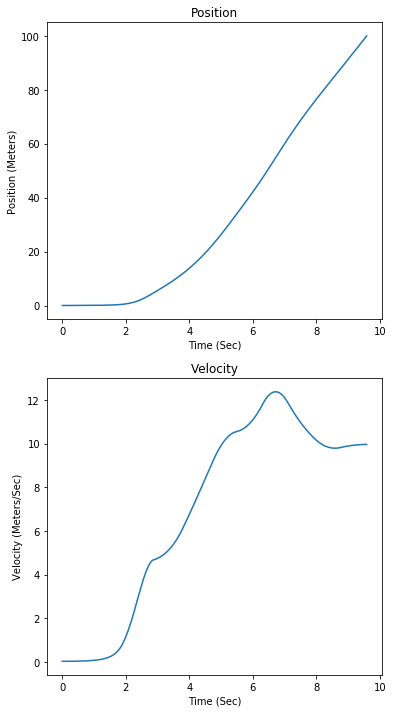

In [22]:
xs = np.array([0, 1.89, 2.88, 3.78, 4.64, 5.47, 6.29, 7.1, 7.92, 8.75, 9.58])
ys = np.arange(11)*10
t = np.linspace(0, 9.58, int(44100*9.58)) # How to sample
[position, velocity, acceleration] = sample_cubic_spline(xs, ys, t)

fs = 44100

v = velocity
p = position
a = acceleration

vscale = 2**v
vscale = np.reshape(vscale,(1,len(vscale)))
vcumsum = np.cumsum(vscale, axis=0)/fs

pcumsum = np.cumsum(vcumsum, axis=1)
pnew = pcumsum.flatten()
vnew = vcumsum.flatten()

vmax = np.max(v)
vnewmax = np.max(vnew)
scale = vmax/vnewmax
vnew *= scale

pmax = np.max(p)
pnewmax = np.max(pnew)
scale = pmax/pnewmax
pnew *= scale



plt.figure(figsize=(6, 12))
plt.subplot(211)
plt.plot(t, pnew)
plt.xlabel("Time (Sec)")
plt.ylabel("Position (Meters)")
plt.title("Position")

plt.subplot(212)
plt.plot(t, vnew)
plt.xlabel("Time (Sec)")
plt.ylabel("Velocity (Meters/Sec)")
plt.title("Velocity")

plt.show()

In [27]:
#scale freq range

#setting 1 and 3 harmonies
freqscale = 3
freq = 100

positionSO = pnew[:] * freq * (2**(0/12))
posSO = np.sin(2*np.pi*positionSO/freqscale)
positionSTH = pnew[:] * freq * (2**(7/12))
posSTH = np.sin(2*np.pi*positionSTH/freqscale)

#creating array for 2,4,5 harmonies 
positionST = np.linspace(0, 9.58, int(44100*9.58))
positionSF = np.linspace(0, 9.58, int(44100*9.58))
positionFN = np.linspace(0, 9.58, int(44100*9.58))

for i in range(len(position)):
    positionFN[i] = 0
    if i == len(position)-1:
        #do major 9
        #print("did major 9")
        positionST[i] = pnew[i] * freq * (2**(4/12))
        positionSF[i] = pnew[i] * freq * (2**(11/12))
        positionFN[i] = pnew[i] * freq * (2**(14/12))
    elif acceleration[i] < 0:
        #do minor 7th
        #print("did minor 7")
        positionST[i] = pnew[i] * freq * (2**(3/12))
        positionSF[i] = pnew[i] * freq * (2**(10/12))
    else:
        #do major 7th
        #print("did major 7")
        positionST[i] = pnew[i] * freq * (2**(4/12))
        positionSF[i] = pnew[i] * freq * (2**(11/12))

#making 2,4,5 sin waves
posST = np.sin(2*np.pi*positionST/freqscale)    
posSF = np.sin(2*np.pi*positionSF/freqscale)  
posFN = np.sin(2*np.pi*positionFN/freqscale)
  
#creating chord
posaudio = posSO + posST + posSTH + posSF + posFN 

In [31]:
#scale freq range

#setting 1 and 3 harmonies
freqscale = 3
freq = 100

velocitySO = vnew[:] * freq * (2**(0/12))
velSO = np.sin(2*np.pi*velocitySO*freqscale)
velocitySTH = vnew[:] * freq * (2**(7/12))
velSTH = np.sin(2*np.pi*velocitySTH*freqscale)

#creating array for 2,4,5 harmonies 
velocityST = np.linspace(0, 9.58, int(44100*9.58))
velocitySF = np.linspace(0, 9.58, int(44100*9.58))
velocityFN = np.linspace(0, 9.58, int(44100*9.58))

for i in range(len(position)):
    velocityFN[i] = 0
    if i == len(position)-1:
        #do major 9
        #print("did major 9")
        velocityST[i] = vnew[i] * freq * (2**(4/12))
        velocitySF[i] = vnew[i] * freq * (2**(11/12))
        velocityFN[i] = vnew[i] * freq * (2**(14/12))
    elif acceleration[i] < 0:
        #do minor 7th
        #print("did minor 7")
        velocityST[i] = vnew[i] * freq * (2**(3/12))
        velocitySF[i] = vnew[i] * freq * (2**(10/12))
    else:
        #do major 7th
        #print("did major 7")
        velocityST[i] = vnew[i] * freq * (2**(4/12))
        velocitySF[i] = vnew[i] * freq * (2**(11/12))

#making 2,4,5 sin waves
velST = np.sin(2*np.pi*velocityST*freqscale)    
velSF = np.sin(2*np.pi*velocitySF*freqscale)  
velFN = np.sin(2*np.pi*velocityFN*freqscale)
  
#creating chord
velaudio = velSO + velST + velSTH + velSF + velFN 

In [28]:
ipd.Audio(posaudio, rate = 44100)

In [32]:
ipd.Audio(velaudio, rate = 44100)